# FUEL CONSUMPTION PREDICTION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




> DETAILS

YEAR : Year of manufacture
MAKE: The manufacturer of the vehicle (e.g., Toyota, Ford). The value [16] may represent an encoded or indexed value for a specific manufacturer.

MODEL: A specific model of the vehicle (e.g., Corolla, Mustang). [1160] is likely an encoded or indexed representation.

VEHICLE CLASS: The category of the vehicle (e.g., sedan, SUV, truck). [0] could correspond to a specific class in an encoded dataset.

ENGINE SIZE: The engine's displacement in liters, which in this case is 1.4 L.

CYLINDERS: The number of engine cylinders, indicating [4] in this vehicle.

TRANSMISSION: The type of transmission (e.g., automatic, manual). [16] might be a code for a specific transmission type.

FUEL: The type of fuel used by the vehicle (e.g., gasoline, diesel, electric). [3] is likely a code for a specific fuel type.

HWY (L/100 km): The highway fuel consumption, measured in liters per 100 kilometers. This vehicle consumes 5.6 L per 100 km on the highway.

COMB (L/100 km): The combined (city and highway) fuel consumption, which is 6.8 L/100 km.

COMB (mpg): The combined fuel efficiency in miles per gallon, which is 42 mpg.

EMISSIONS: The amount of CO₂ emissions in grams per kilometer, which is 159 g/km.

# VALUES IN EACH FEATURES



>**MAKE**

**Unique values in 'MAKE' column:**
* ACURA
* AUDI
* BMW
* BUICK
* CADILLAC
* CHEVROLET
* CHRYSLER
* DAEWOO
* DODGE
* FERRARI
* FORD
* GMC
* HONDA
* HYUNDAI
* INFINITI
* ISUZU
* JAGUAR
* JEEP
* KIA
* LAND ROVER
* LEXUS
* LINCOLN
* MAZDA
* MERCEDES-BENZ
* NISSAN
* OLDSMOBILE
* PLYMOUTH
* PONTIAC
* PORSCHE
* SAAB
* SATURN
* SUBARU
* SUZUKI
* TOYOTA
* VOLKSWAGEN
* VOLVO
* BENTLEY
* ROLLS-ROYCE
* MASERATI
* MINI
* MITSUBISHI
* SMART
* HUMMER
* ASTON MARTIN
* LAMBORGHINI
* BUGATTI
* SCION
* FIAT
* RAM
* SRT
* ALFA ROMEO
* GENESIS

>**VEHICLE CLASS**

* COMPACT
* MID-SIZE
* SUBCOMPACT
* STATION WAGON - MID-SIZE
* MINICOMPACT
* TWO-SEATER
* STATION WAGON - SMALL
* FULL-SIZE
* SUV
* VAN - CARGO
* VAN - PASSENGER
* PICKUP TRUCK - STANDARD
* PICKUP TRUCK - SMALL
* MINIVAN
* SUV - STANDARD
* SPECIAL PURPOSE VEHICLE
* SUV - SMALL
* SUV: SMALL
* STATION WAGON: SMALL
* SUV: STANDARD
* PICKUP TRUCK: SMALL
* PICKUP TRUCK: STANDARD
* VAN: PASSENGER
* STATION WAGON: MID-SIZE

>**TRANSMISSION:**:

**Understanding Transmission Codes:**

*   A = Automatic Transmission
*  M = Manual Transmission
*  AM = Automated Manual Transmission (AMT)
*  AS = Automated Sequential Transmission
*  AV = Continuously Variable Transmission (CVT)
*  Numbers (4, 5, 6, etc.) = Number of gears (speeds)

**Breaking Down Some Examples**

*  A4 → Automatic transmission with 4 gears
*  M5 → Manual transmission with 5 gears
*  AS5 → Automated Sequential transmission with 5 gears
*  AV → Continuously Variable Transmission (CVT)
*  AV6 → CVT with a defined 6-speed mode
*  AM6 → Automated Manual Transmission (AMT) with 6 gears
*  A10 → Automatic transmission with 10 gears
*  AS10 → Automated Sequential transmission with 10 gears

**Types of Transmission in Vehicles**
*  Manual (M) → Requires driver input to shift gears (e.g., M5 = 5-speed manual).
*  Automatic (A) → Shifts gears automatically without driver input (e.g., A6 = 6-speed automatic).
*  Automated Manual (AM) → Uses an automatic system to shift gears in a manual gearbox (e.g., AM7).
*  Automated Sequential (AS) → A type of automatic transmission that allows manual-like gear changes (e.g., AS6).
*  Continuously Variable Transmission (AV or CVT) → A gearless transmission that continuously adjusts for efficiency (e.g., AV6 = CVT with simulated 6-speed modes).

>**Possible Interpretations of Fuel Codes**

*  X → Petrol (Gasoline)
*  Z → Diesel
*  E → Electric
*  N → Natural Gas (CNG/LNG)
*  D → Hybrid (Diesel + Electric or Petrol + Electric)

# CODE

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')



> Data Collection



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TNAU Python, machineLearning/Fuel_Consumption.csv')
d = pd.read_csv('/content/drive/MyDrive/TNAU Python, machineLearning/Fuel_Consumption.csv')
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [ ]:
vehicle_classes = ['COMPACT', 'MID-SIZE', 'SUBCOMPACT', 'STATION WAGON - MID-SIZE',
                   'MINICOMPACT', 'TWO-SEATER', 'STATION WAGON - SMALL', 'FULL-SIZE', 'SUV',
                   'VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD',
                   'PICKUP TRUCK - SMALL', 'MINIVAN', 'SUV - STANDARD',
                   'SPECIAL PURPOSE VEHICLE', 'SUV - SMALL', 'SUV: SMALL',
                   'STATION WAGON: SMALL', 'SUV: STANDARD', 'PICKUP TRUCK: SMALL',
                   'PICKUP TRUCK: STANDARD', 'VAN: PASSENGER', 'STATION WAGON: MID-SIZE']

for vehicle_class in vehicle_classes:
    print('*', vehicle_class)

* COMPACT
* MID-SIZE
* SUBCOMPACT
* STATION WAGON - MID-SIZE
* MINICOMPACT
* TWO-SEATER
* STATION WAGON - SMALL
* FULL-SIZE
* SUV
* VAN - CARGO
* VAN - PASSENGER
* PICKUP TRUCK - STANDARD
* PICKUP TRUCK - SMALL
* MINIVAN
* SUV - STANDARD
* SPECIAL PURPOSE VEHICLE
* SUV - SMALL
* SUV: SMALL
* STATION WAGON: SMALL
* SUV: STANDARD
* PICKUP TRUCK: SMALL
* PICKUP TRUCK: STANDARD
* VAN: PASSENGER
* STATION WAGON: MID-SIZE


In [ ]:
li= ['ACURA', 'AUDI', 'BMW' ,'BUICK', 'CADILLAC', 'CHEVROLET' ,'CHRYSLER', 'DAEWOO',
 'DODGE', 'FERRARI', 'FORD' ,'GMC' ,'HONDA', 'HYUNDAI' ,'INFINITI' ,'ISUZU',
 'JAGUAR' ,'JEEP', 'KIA', 'LAND ROVER', 'LEXUS', 'LINCOLN' ,'MAZDA',
 'MERCEDES-BENZ', 'NISSAN', 'OLDSMOBILE', 'PLYMOUTH' ,'PONTIAC', 'PORSCHE',
 'SAAB', 'SATURN', 'SUBARU', 'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'BENTLEY',
 'ROLLS-ROYCE', 'MASERATI', 'MINI', 'MITSUBISHI', 'SMART', 'HUMMER',
 'ASTON MARTIN', 'LAMBORGHINI', 'BUGATTI', 'SCION', 'FIAT', 'RAM', 'SRT',
 'ALFA ROMEO', 'GENESIS']
for i in li:
    print('*',i)

* ACURA
* AUDI
* BMW
* BUICK
* CADILLAC
* CHEVROLET
* CHRYSLER
* DAEWOO
* DODGE
* FERRARI
* FORD
* GMC
* HONDA
* HYUNDAI
* INFINITI
* ISUZU
* JAGUAR
* JEEP
* KIA
* LAND ROVER
* LEXUS
* LINCOLN
* MAZDA
* MERCEDES-BENZ
* NISSAN
* OLDSMOBILE
* PLYMOUTH
* PONTIAC
* PORSCHE
* SAAB
* SATURN
* SUBARU
* SUZUKI
* TOYOTA
* VOLKSWAGEN
* VOLVO
* BENTLEY
* ROLLS-ROYCE
* MASERATI
* MINI
* MITSUBISHI
* SMART
* HUMMER
* ASTON MARTIN
* LAMBORGHINI
* BUGATTI
* SCION
* FIAT
* RAM
* SRT
* ALFA ROMEO
* GENESIS


In [ ]:
VEHCLASS= ['COMPACT' 'MID-SIZE' 'SUBCOMPACT' 'STATION WAGON - MID-SIZE'
 'MINICOMPACT' 'TWO-SEATER' 'STATION WAGON - SMALL' 'FULL-SIZE' 'SUV'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD'
 'PICKUP TRUCK - SMALL' 'MINIVAN' 'SUV - STANDARD'
 'SPECIAL PURPOSE VEHICLE' 'SUV - SMALL' 'SUV: SMALL'
 'STATION WAGON: SMALL' 'SUV: STANDARD' 'PICKUP TRUCK: SMALL'
 'PICKUP TRUCK: STANDARD' 'VAN: PASSENGER' 'STATION WAGON: MID-SIZE']


In [ ]:
#changing MAKE into Upper case
df['MAKE'] = df['MAKE'].str.upper()
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].str.upper()
for col in df.columns:
  print(f"Unique values in '{col}' column:")
  print(df[col].unique())
  print("-" * 20)


Unique values in 'YEAR' column:
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022]
--------------------
Unique values in 'MAKE' column:
['ACURA' 'AUDI' 'BMW' 'BUICK' 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DAEWOO'
 'DODGE' 'FERRARI' 'FORD' 'GMC' 'HONDA' 'HYUNDAI' 'INFINITI' 'ISUZU'
 'JAGUAR' 'JEEP' 'KIA' 'LAND ROVER' 'LEXUS' 'LINCOLN' 'MAZDA'
 'MERCEDES-BENZ' 'NISSAN' 'OLDSMOBILE' 'PLYMOUTH' 'PONTIAC' 'PORSCHE'
 'SAAB' 'SATURN' 'SUBARU' 'SUZUKI' 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'BENTLEY'
 'ROLLS-ROYCE' 'MASERATI' 'MINI' 'MITSUBISHI' 'SMART' 'HUMMER'
 'ASTON MARTIN' 'LAMBORGHINI' 'BUGATTI' 'SCION' 'FIAT' 'RAM' 'SRT'
 'ALFA ROMEO' 'GENESIS']
--------------------
Unique values in 'MODEL' column:
['1.6EL' '3.2TL' '3.5RL' ... 'V90 CC B6 AWD' 'XC60 B5 AWD' 'XC60 B6 AWD']
--------------------
Unique values in 'VEHICLE CLASS' column:
['COMPACT' 'MID-SIZE' 'SUBCOMPACT' 'STATION WAGON - MID-SIZE'
 'MINICOMPACT' 'TWO-SEATER' 'STATION WAGO

In [ ]:
df.isna().sum()

,0
YEAR,0
MAKE,0
MODEL,0
VEHICLE CLASS,0
ENGINE SIZE,0
CYLINDERS,0
TRANSMISSION,0
FUEL,0
FUEL CONSUMPTION,0
HWY (L/100 km),0


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encoding the categorical data
le = LabelEncoder()
df['YEAR'] = le.fit_transform(df['YEAR'])
df['MAKE'] = le.fit_transform(df['MAKE'])
df['MODEL'] = le.fit_transform(df['MODEL'])
df['VEHICLE CLASS'] = le.fit_transform(df['VEHICLE CLASS'])
df['TRANSMISSION'] = le.fit_transform(df['TRANSMISSION'])
df['FUEL'] = le.fit_transform(df['FUEL'])

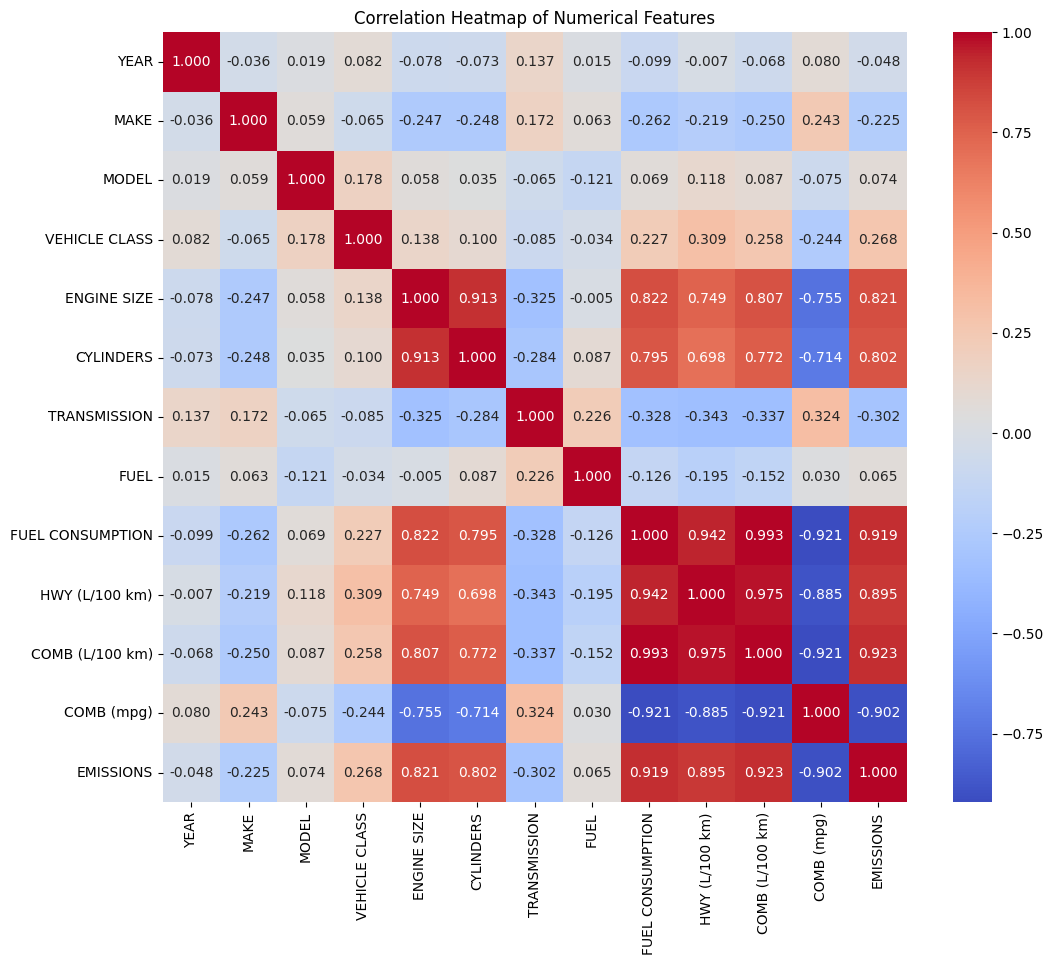

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and contains numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [ ]:
x = df.drop(['FUEL CONSUMPTION'], axis=1)
y = df[['FUEL CONSUMPTION']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
print("x_train.shape    :  ", x_train.shape)
print("x_test.shape     :  ", x_test.shape)
print("y_train.shape   :  ", y_train.shape)
print("y_test.shape      :  ", y_test.shape)

x_train.shape    :   (18044, 12)
x_test.shape     :   (4512, 12)
y_train.shape   :   (18044, 1)
y_test.shape      :   (4512, 1)



>Fitting Regression models



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
r=[]

linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
svr = SVR()


models = [linear_reg, decision_tree, random_forest, svr]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector Regression']

for model, name in zip(models, model_names):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    r.append(r2)
    print("Model: ",name)
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print()

Model:  Linear Regression
Mean Squared Error: 0.00618541661012145
R-squared: 0.9994883440819443

Model:  Decision Tree
Mean Squared Error: 0.008787677304964537
R-squared: 0.9992730858109555

Model:  Random Forest
Mean Squared Error: 0.004887962101063844
R-squared: 0.9995956691531257

Model:  Support Vector Regression
Mean Squared Error: 1.9559948577261301
R-squared: 0.83820065684754



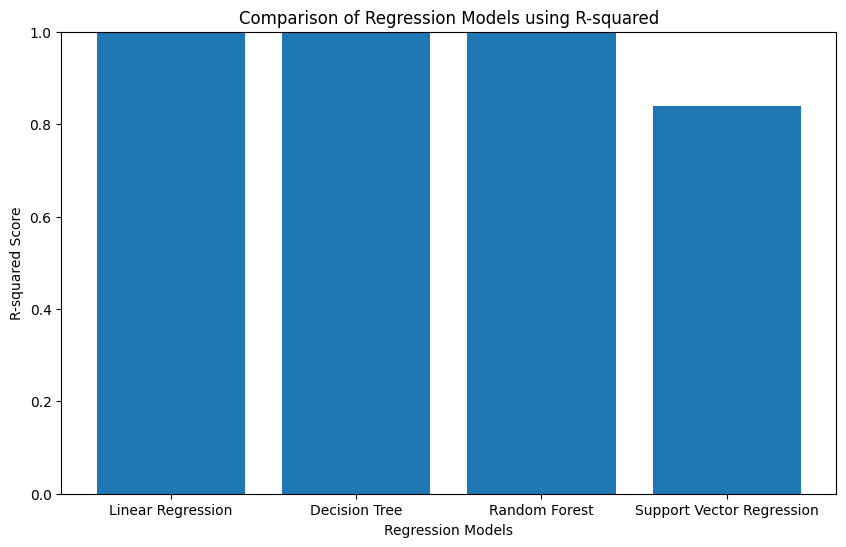

In [ ]:
import matplotlib.pyplot as plt
r2_scores = []
for model, name in zip(models, model_names):
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores)
plt.xlabel("Regression Models")
plt.ylabel("R-squared Score")
plt.title("Comparison of Regression Models using R-squared")
plt.ylim(0, 1)
plt.show()



> Prediction



In [ ]:
custom_values = pd.DataFrame({'YEAR': [16],
                              'MAKE': [16],
                              'MODEL': [1160],
                              'VEHICLE CLASS': [0],
                              'ENGINE SIZE': [1.4],
                              'CYLINDERS': [4],
                              'TRANSMISSION': [16],
                              'FUEL': [3],
                              'HWY (L/100 km)': [5.6],
                              'COMB (L/100 km)': [6.8],
                              'COMB (mpg)' :  [42],
                              'EMISSIONS' : 159})
predicted_consumption_custom = random_forest.predict(custom_values)
print(f"Predicted Fuel Consumption with custom values: {predicted_consumption_custom}")
print(f"Predicted Fuel Consumption and Price Prediction: {predicted_consumption_custom*100}")

Predicted Fuel Consumption with custom values: [7.782]
Predicted Fuel Consumption and Price Prediction: [778.2]


In [ ]:
# prompt: download the pickle file

import pickle
from google.colab import files

# Assuming your trained model is stored in the 'random_forest' variable
# and you want to save it as 'model.pkl'

with open('fuel.pkl', 'wb') as file:
    pickle.dump(random_forest, file)

# Download the pickle file
files.download('fuel.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.4 MB/s eta 0:00:00


In [ ]:
import gradio as gr

def predict_fuel_consumption(year, make, model, vehicle_class, engine_size, cylinders, transmission, fuel, hwy_l_100km, comb_l_100km, comb_mpg, emissions):
    new_data_point = pd.DataFrame({'YEAR': [year],
                                  'MAKE': [make],
                                  'MODEL': [model],
                                  'VEHICLE CLASS': [vehicle_class],
                                  'ENGINE SIZE': [engine_size],
                                  'CYLINDERS': [cylinders],
                                  'TRANSMISSION': [transmission],
                                  'FUEL': [fuel],
                                  'HWY (L/100 km)': [hwy_l_100km],
                                  'COMB (L/100 km)': [comb_l_100km],
                                  'COMB (mpg)': [comb_mpg],
                                  'EMISSIONS': [emissions]})
    predicted_consumption = svr.predict(new_data_point)
    predicted_price = predicted_consumption[0] * 100  # Assuming price is 100 times consumption
    return f"{predicted_consumption[0]:.2f} liters", f"Rs. {predicted_price:.2f}"

iface = gr.Interface(
    fn=predict_fuel_consumption,
    inputs=[
        gr.Number(label="Year"),
        gr.Number(label="Make"),
        gr.Number(label="Model"),
        gr.Number(label="Vehicle Class"),
        gr.Number(label="Engine Size"),
        gr.Number(label="Cylinders"),
        gr.Number(label="Transmission"),
        gr.Number(label="Fuel"),
        gr.Number(label="Highway (L/100 km)"),
        gr.Number(label="Combined (L/100 km)"),
        gr.Number(label="Combined (mpg)"),
        gr.Number(label="Emissions")
    ],
    outputs=[
        gr.Textbox(label="Predicted Fuel Consumption"),
        gr.Textbox(label="Predicted Fuel Price")
    ],
    title="Fuel Consumption and Price Prediction",
    description="Enter vehicle specifications to predict fuel consumption and price.",
         theme="huggingface",
    css="""
    body {
        background-color: red; /* Light gray background */
    }
    .gradio-title {
        color: blue; /* Blue title text */
    }
    .gradio-header {
        color: blue; /* Blue header text */
    }
    .gradio-text {
        color: blue; /* Blue text color */
    }
    .gradio-container {
      background-color:#bcf1e4; /* Blue header text */
      border-radius: 10px;
      padding: 20px;
    }
    """
)
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d9e8c77ae2ba0e1f7b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
df.shape

(22556, 13)

In [ ]:
# prompt: count the points for Ai and user when user gives 'Q' as input show the scores, and prints who is the winner
import random
# Dictionary to determine the winner
winning_moves = {
    'R': 'S',  # Rock beats Scissors
    'S': 'P',  # Scissors beats Paper
    'P': 'R'   # Paper beats Rock
}

# Initialize scores
ai_score = 0
player_score = 0

# List to store player's move history
player_moves = []

# Function to get AI move based on history
def get_ai_move():
    if len(player_moves) == 0:
        return random.choice(['R', 'P', 'S'])  # First move is random
    else:
        # Predict player’s next move (assume they repeat last move)
        predicted_move = player_moves[-1]
        # AI picks the move that beats predicted move
        return [key for key, value in winning_moves.items() if value == predicted_move][0]

# Function to determine the winner and update scores
def check_winner(player, ai):
    global ai_score, player_score
    if player == ai:
        return "It's a Draw! 🤝"
    elif winning_moves[player] == ai:
        player_score += 1
        return "You Win! 🎉"
    else:
        ai_score += 1
        return "AI Wins! 🤖"

# Function to play the game
def play_game():
    global ai_score, player_score
    print("Welcome to Rock, Paper, Scissors!")
    print("Enter 'R' for Rock, 'P' for Paper, 'S' for Scissors, or 'Q' to quit.")

    while True:
        player_choice = input("Your Move: ").upper()

        if player_choice == 'Q':
            print("Game Over! Thanks for playing. 😊")
            print("Final Scores:")
            print(f"AI: {ai_score}, Player: {player_score}")
            if ai_score > player_score:
                print("AI is the winner! 🤖")
            elif player_score > ai_score:
                print("You are the winner! 🎉")
            else:
                print("It's a tie! 🤝")
            break

        if player_choice not in ['R', 'P', 'S']:
            print("Invalid input! Please enter R, P, or S.")
            continue

        # AI makes its move
        ai_choice = get_ai_move()

        # Store player's move for AI to learn
        player_moves.append(player_choice)

        print(f"AI chose: {ai_choice}")
        result = check_winner(player_choice, ai_choice)
        print(result)
        print(f"Current Scores: AI - {ai_score}, Player - {player_score}")
        print("\n")

# Run the game
play_game()


Welcome to Rock, Paper, Scissors!
Enter 'R' for Rock, 'P' for Paper, 'S' for Scissors, or 'Q' to quit.
Your Move: R
AI chose: S
You Win! 🎉
Current Scores: AI - 0, Player - 1


Your Move: P
AI chose: P
It's a Draw! 🤝
Current Scores: AI - 0, Player - 1


Your Move: S
AI chose: S
It's a Draw! 🤝
Current Scores: AI - 0, Player - 1


Your Move: S
AI chose: R
AI Wins! 🤖
Current Scores: AI - 1, Player - 1


Your Move: Q
Game Over! Thanks for playing. 😊
Final Scores:
AI: 1, Player: 1
It's a tie! 🤝


In [ ]:
import random

# Tic-Tac-Toe board
board = [[' ' for _ in range(3)] for _ in range(3)]

def print_board():
    for row in board:
        print('|'.join(row))
        print('-' * 5)

def check_winner(player):
    for row in board:
        if all(cell == player for cell in row):
            return True
    for col in range(3):
        if all(board[row][col] == player for row in range(3)):
            return True
    if all(board[i][i] == player for i in range(3)) or all(board[i][2-i] == player for i in range(3)):
        return True
    return False

def get_available_moves():
    return [(i, j) for i in range(3) for j in range(3) if board[i][j] == ' ']

def heuristic(move, player):
    i, j = move
    board[i][j] = player
    score = sum(row.count(player) for row in board) + sum(board[k][j] == player for k in range(3))
    board[i][j] = ' '
    return score

def ai_move():
    moves = get_available_moves()
    best_move = max(moves, key=lambda move: heuristic(move, 'O'))
    board[best_move[0]][best_move[1]] = 'O'

def play_game():
    print("Welcome to Tic-Tac-Toe AI!")
    print_board()

    for _ in range(9):
        row, col = map(int, input("Enter row and column (0-2): ").split())
        if board[row][col] != ' ':
            print("Invalid move, try again.")
            continue
        board[row][col] = 'X'

        if check_winner('X'):
            print_board()
            print("Player Wins!")
            return

        if len(get_available_moves()) == 0:
            print("It's a Draw!")
            return

        ai_move()
        print_board()

        if check_winner('O'):
            print("AI Wins!")
            return

play_game()